_version log: seperated code into jupyter notebook cells_

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def single_sided_ft(x, Fs):
    N = x.shape[0]
    NFFT = 2 ** np.ceil(np.log2(N))
    X = np.fft.fft(x, int(NFFT)) / N
    f = Fs / 2 * np.linspace(0, 1, int(NFFT / 2 + 1))
    f = f[:, np.newaxis]
    X = 2 * np.abs(X[:int(NFFT / 2 + 1)])
    return X, f

C:\Users\syf83691\AppData\Local\Temp\ipykernel_10932\3019850736.py:27: RuntimeWarning: divide by zero encountered in divide
  um = 1.0 / um1


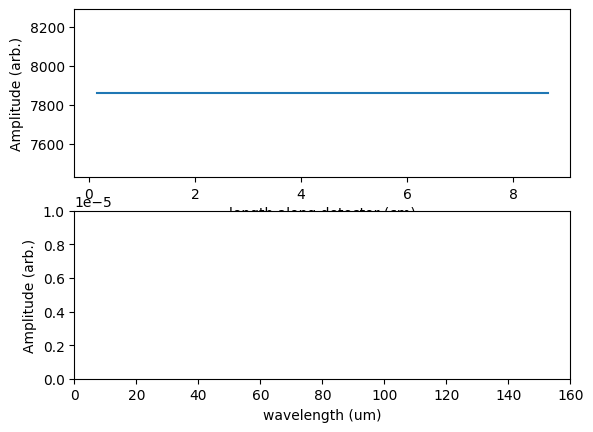

In [5]:
f = open('data\\elin_mock_interferogram.csv', 'rt')
C = np.loadtxt(f, skiprows=26, delimiter = ";")  # 26 for us
f.close()
theta = 0.65  # 0.41

sin_theta_incident = np.sin(theta * np.pi / 180)

dx = 500  # 2.2%500% in um this is the spacing between pixels - Thz is 0.5mm (500um)

A = np.array(C)
npoints = A.shape[0]
x = A[:, 1]
shave = 3
x = x[shave:]
y = np.arange(shave, npoints)  # y is just in points

plt.subplot(2, 1, 1)
plt.plot(y * dx * 1e-4, x)
plt.xlabel('length along detector (cm)')
plt.ylabel('Amplitude (arb.)')
In = np.vstack((y, x)).T
np.savetxt('interferogram.txt', In, fmt='%6.9f %12.9f')

spectrum, kd = single_sided_ft(x, 1.0 / dx)

um1 = kd / (2 * sin_theta_incident)
um = 1.0 / um1

I3 = np.argmax(um > 90)
I4 = np.argmax(um > 80)
sigum = um[I3:I4]
sigB1 = spectrum[I3:I4]
Signalfit = np.vstack((sigum.flatten(), sigB1))

T = spectrum
plt.subplot(2, 1, 2)
plt.plot(um, T)
plt.axis([0, 160, 0, 10e-6])
plt.xlabel('wavelength (um)')
plt.ylabel('Amplitude (arb.)')

plt.show()

In [ ]:
B95 = np.vstack((um.flatten(), T)).T
np.savetxt('outputwave.txt', B95, fmt='%6.9f %12.9f')